In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #서브 패키지 pyplot 사용
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
else:
    print('Unknown system...  sorry~~~')

In [4]:
import seaborn as sns #seaborn 패키지 임포트

In [5]:
data=pd.read_csv('project1.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SIG_CD       88 non-null     int64  
 1   SIG_KOR_NM   88 non-null     object 
 2   유소년비율        88 non-null     float64
 3   조출생률         88 non-null     float64
 4   1인 가구비율      88 non-null     float64
 5   터널수          88 non-null     int64  
 6   만명당 매장 수     88 non-null     float64
 7   만명 당 의료기관 수  88 non-null     float64
 8   만명당 3차병원수    88 non-null     float64
 9   만명당 2차병원 수   88 non-null     float64
 10  만명당 1차병원 수   88 non-null     float64
 11  만명당 요양병원 수   88 non-null     float64
 12  만먕당 한의원 수    88 non-null     float64
 13  1차산업비율       88 non-null     float64
 14  2차산업비율       88 non-null     float64
 15  ktx거리        88 non-null     float64
 16  빈집비율         88 non-null     float64
 17  산지면적/도시면적    88 non-null     float64
 18  재정자립도        88 non-null     float64
 19  연평균인구증감률  

In [6]:
pj_data = data.drop(['SIG_CD','SIG_KOR_NM','시도'], axis=1)
pj_data.set_index('시군구', inplace=True)
pj_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 강원도 고성군 to 충청북도 제천시
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   유소년비율        88 non-null     float64
 1   조출생률         88 non-null     float64
 2   1인 가구비율      88 non-null     float64
 3   터널수          88 non-null     int64  
 4   만명당 매장 수     88 non-null     float64
 5   만명 당 의료기관 수  88 non-null     float64
 6   만명당 3차병원수    88 non-null     float64
 7   만명당 2차병원 수   88 non-null     float64
 8   만명당 1차병원 수   88 non-null     float64
 9   만명당 요양병원 수   88 non-null     float64
 10  만먕당 한의원 수    88 non-null     float64
 11  1차산업비율       88 non-null     float64
 12  2차산업비율       88 non-null     float64
 13  ktx거리        88 non-null     float64
 14  빈집비율         88 non-null     float64
 15  산지면적/도시면적    88 non-null     float64
 16  재정자립도        88 non-null     float64
 17  연평균인구증감률     88 non-null     float64
dtypes: float64(17), int64(1)
memory usage: 13.1+ 

In [7]:
#X=pj_data
#from sklearn import preprocessing
#X=preprocessing.StandardScaler().fit(X).transform(X)

In [8]:
kmeans=KMeans(n_clusters=3, init='k-means++', random_state=10)
kmeans.fit(pj_data)

KMeans(n_clusters=3, random_state=10)

In [9]:
kmeans.labels_

array([2, 1, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1,
       2, 2, 2, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 1],
      dtype=int32)

In [10]:
cluster = kmeans.predict(pj_data)
cluster

array([2, 1, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1,
       2, 2, 2, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 1],
      dtype=int32)

In [11]:
pj_data['cluster']=kmeans.labels_

In [12]:
pj_data.head(3)

,유소년비율,조출생률,1인 가구비율,터널수,만명당 매장 수,만명 당 의료기관 수,만명당 3차병원수,만명당 2차병원 수,만명당 1차병원 수,만명당 요양병원 수,만먕당 한의원 수,1차산업비율,2차산업비율,ktx거리,빈집비율,산지면적/도시면적,재정자립도,연평균인구증감률,cluster
시군구,,,,,,,,,,,,,,,,,,,
강원도 고성군,7.629285,3.657877,0.364831,1,0.746505,8.584812,0.0,0.000000,0.000000,0.000000,1.493011,23.08,12.13,78.2998,15.6,44.137726,8.6,-2.9116,2
강원도 삼척시,9.679533,5.455404,0.403534,20,0.609542,8.381208,0.0,0.152386,0.152386,0.152386,1.523856,9.12,16.64,6.5740,17.2,13.059622,13.5,-1.6028,1
강원도 양구군,11.836990,7.104875,0.294097,7,0.893695,8.936950,0.0,0.000000,1.340542,0.000000,1.787390,28.26,7.83,69.6764,7.8,142.838275,8.1,-1.8544,0


In [13]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

In [14]:
pca_transformed=pca.fit_transform(pj_data)

In [15]:
pca_transformed

array([[ 24.89947617,  47.02978395],
       [-21.71464221, -19.92160806],
       [118.35534763,  18.16950956],
       [ 22.50682272,  -3.60787752],
       [  6.66649359,  -4.29251327],
       [ -6.34500933,   5.34223225],
       [  3.09723758,  38.52715584],
       [-26.3145329 ,  16.73089894],
       [ 43.24162134, -19.16633711],
       [ 27.24554279, -32.21363736],
       [ 37.72659546,  35.74938949],
       [ 42.65115769, -33.23672873],
       [-18.09464331,   8.04685561],
       [ -9.57171197,  31.67344083],
       [ -1.44167784,  27.88929077],
       [-11.55615944,   3.36872214],
       [ -5.67684391,  -1.85444461],
       [-20.06931786, -29.59387748],
       [ 36.49896714,   3.66883687],
       [ -5.09311648,   3.60235984],
       [-20.49824575,   8.71273453],
       [  4.14326625,   2.25487605],
       [-25.62020494,  -8.21801388],
       [  6.3234163 ,   2.50791406],
       [ 11.23690382,  14.25551678],
       [-16.27692802,   0.35258045],
       [ 41.4198477 ,   2.52729383],
 

In [16]:
pj_data['pca_x']=pca_transformed[:,0]
pj_data['pca_y']=pca_transformed[:,1]
pj_data.head()

,유소년비율,조출생률,1인 가구비율,터널수,만명당 매장 수,만명 당 의료기관 수,만명당 3차병원수,만명당 2차병원 수,만명당 1차병원 수,만명당 요양병원 수,...,1차산업비율,2차산업비율,ktx거리,빈집비율,산지면적/도시면적,재정자립도,연평균인구증감률,cluster,pca_x,pca_y
시군구,,,,,,,,,,,,,,,,,,,,,
강원도 고성군,7.629285,3.657877,0.364831,1,0.746505,8.584812,0.0,0.000000,0.000000,0.000000,...,23.08,12.13,78.2998,15.6,44.137726,8.6,-2.9116,2,24.899476,47.029784
강원도 삼척시,9.679533,5.455404,0.403534,20,0.609542,8.381208,0.0,0.152386,0.152386,0.152386,...,9.12,16.64,6.5740,17.2,13.059622,13.5,-1.6028,1,-21.714642,-19.921608
강원도 양구군,11.836990,7.104875,0.294097,7,0.893695,8.936950,0.0,0.000000,1.340542,0.000000,...,28.26,7.83,69.6764,7.8,142.838275,8.1,-1.8544,0,118.355348,18.169510
강원도 양양군,7.984798,3.221428,0.361109,52,0.723916,7.239164,0.0,0.000000,0.000000,0.000000,...,25.15,12.57,42.4503,23.7,44.811864,14.1,0.6621,0,22.506823,-3.607878
강원도 영월군,7.560308,3.207719,0.378748,11,1.043161,8.345286,0.0,0.260790,0.260790,0.260790,...,25.87,12.82,23.6510,11.3,36.154246,15.2,-0.8921,2,6.666494,-4.292513


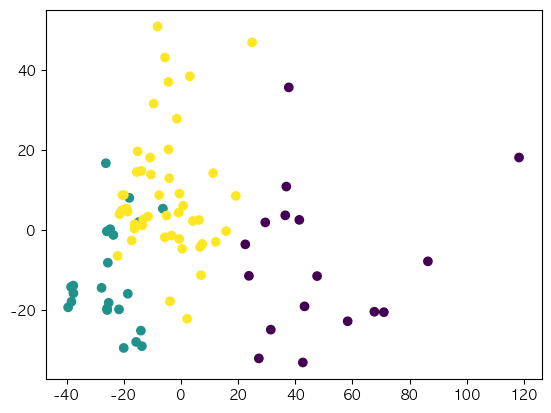

In [17]:
plt.scatter(x=pj_data.loc[:,'pca_x'],y=pj_data.loc[:,'pca_y'],
           c=pj_data['cluster'])

pj_data.reset_index(inplace=True)

for i in range(len(pj_data)):
    row=pj_data.iloc[i]
    name=row['시군구']
    x = row['pca_x']
    y = row['pca_y']
    if name in ['경상북도 울릉군']:
        plt.text(x-0.5, y-0.5, name, fontsize=8)

pj_data.set_index('시군구', inplace=True)

In [18]:
pj_data.reset_index(inplace=True)
clusterDF = pd.DataFrame(data=pca_transformed, columns=['ftr1','ftr2'])
clusterDF['cluster'] = pj_data['cluster']
clusterDF

,ftr1,ftr2,cluster
0,24.899476,47.029784,2
1,-21.714642,-19.921608,1
2,118.355348,18.169510,0
3,22.506823,-3.607878,0
4,6.666494,-4.292513,2
...,...,...,...
83,-14.040437,-25.251972,1
84,-0.840290,4.350678,2
85,-0.543040,9.090053,2
86,31.433222,-25.004023,0


In [19]:
centers=kmeans.cluster_centers_
centers

array([[ 7.92911870e+00,  3.72167639e+00,  3.53718354e-01,
         2.18235294e+01,  5.69730777e-01,  1.21324253e+01,
         0.00000000e+00,  2.02441003e-02,  2.69302807e-01,
         2.05193977e-01,  2.08694428e+00,  4.03229412e+01,
         1.06835294e+01,  3.07187706e+01,  1.34117647e+01,
         7.40847378e+01,  9.05882353e+00, -9.52905882e-01],
       [ 9.33016226e+00,  3.84879458e+00,  3.60494958e-01,
         1.39130435e+01,  8.08444067e-01,  1.19639158e+01,
         2.11915029e-02,  9.26187594e-02,  3.22216249e-01,
         4.95785054e-01,  2.55325924e+00,  1.80169565e+01,
         1.88317391e+01,  1.11720913e+01,  1.34000000e+01,
         7.86701077e+00,  1.32000000e+01, -1.40614348e+00],
       [ 8.40553671e+00,  4.14283191e+00,  3.57047698e-01,
         1.37916667e+01,  6.31876094e-01,  1.36284170e+01,
        -4.33680869e-18,  5.29053487e-02,  3.03329451e-01,
         4.70488260e-01,  2.37967794e+00,  4.12489583e+01,
         1.26535417e+01,  3.34902813e+01,  1.50020833e

In [20]:
unique_labels=np.unique(cluster)
unique_labels

array([0, 1, 2], dtype=int32)

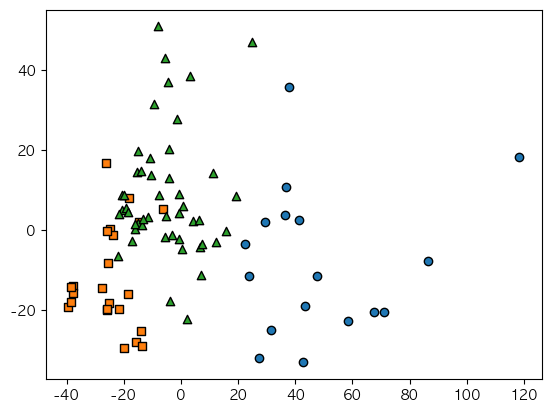

In [21]:
markers=['o','s','^','P','D','H','x']

for target in unique_labels :
    target_cluster = clusterDF[clusterDF['cluster']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'],
               edgecolor='k', marker=markers[target])
plt.show()

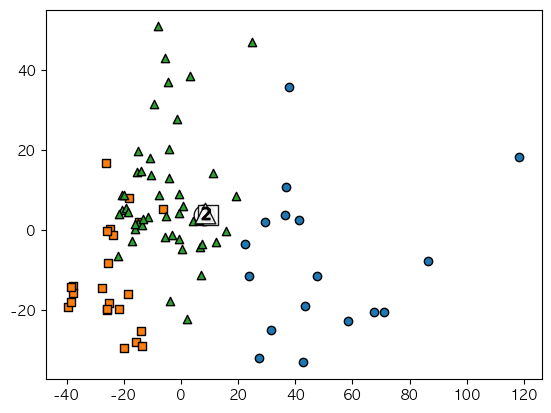

In [22]:
for label in unique_labels:
    
    label_cluster=clusterDF[clusterDF['cluster']==label]
    center_x_y=centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'],
                edgecolor='k', marker=markers[label])
    
    center_x_y=centers[label]
    
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=220, color='white',
               alpha=0.9, edgecolor='k',  marker=markers[label])
    
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=80, color='k',
                edgecolor='k', marker='$%d$' % label)
    
    
plt.show()

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [24]:
pj_data.set_index('시군구',inplace=True)
pj_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 강원도 고성군 to 충청북도 제천시
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   유소년비율        88 non-null     float64
 1   조출생률         88 non-null     float64
 2   1인 가구비율      88 non-null     float64
 3   터널수          88 non-null     int64  
 4   만명당 매장 수     88 non-null     float64
 5   만명 당 의료기관 수  88 non-null     float64
 6   만명당 3차병원수    88 non-null     float64
 7   만명당 2차병원 수   88 non-null     float64
 8   만명당 1차병원 수   88 non-null     float64
 9   만명당 요양병원 수   88 non-null     float64
 10  만먕당 한의원 수    88 non-null     float64
 11  1차산업비율       88 non-null     float64
 12  2차산업비율       88 non-null     float64
 13  ktx거리        88 non-null     float64
 14  빈집비율         88 non-null     float64
 15  산지면적/도시면적    88 non-null     float64
 16  재정자립도        88 non-null     float64
 17  연평균인구증감률     88 non-null     float64
 18  cluster      88 non-null     int32  
 19  pca

In [25]:
pj_data.to_csv('project_result.csv')

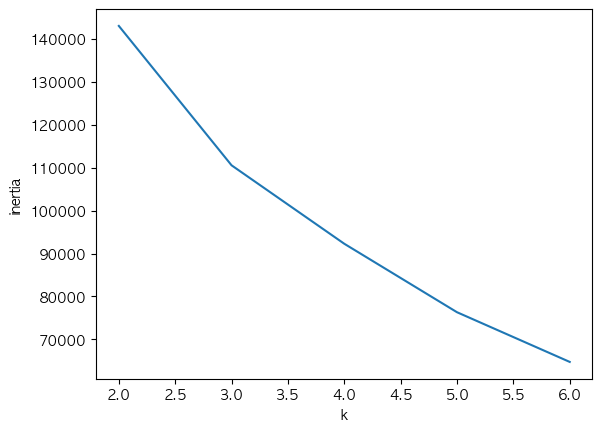

In [26]:
inertia=[]
for k in range(2,7):
    km=KMeans(n_clusters=k)
    km.fit(pj_data)
    inertia.append(km.inertia_)
plt.plot(range(2,7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.savefig('approprate_k.png')
plt.show()

In [27]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

Automatically created module for IPython interactive environment


In [28]:
X= pca_transformed

In [29]:
y= kmeans.labels_

In [31]:
data.columns

Index(['SIG_CD', 'SIG_KOR_NM', '유소년비율', '조출생률', '1인 가구비율', '터널수', '만명당 매장 수',
       '만명 당 의료기관 수', '만명당 3차병원수', '만명당 2차병원 수', '만명당 1차병원 수', '만명당 요양병원 수',
       '만먕당 한의원 수', '1차산업비율', '2차산업비율', 'ktx거리', '빈집비율', '산지면적/도시면적', '재정자립도',
       '연평균인구증감률', '시도', '시군구'],
      dtype='object')

In [33]:
df=data.drop(['시도','SIG_CD','SIG_KOR_NM'], axis=1)
df

,유소년비율,조출생률,1인 가구비율,터널수,만명당 매장 수,만명 당 의료기관 수,만명당 3차병원수,만명당 2차병원 수,만명당 1차병원 수,만명당 요양병원 수,만먕당 한의원 수,1차산업비율,2차산업비율,ktx거리,빈집비율,산지면적/도시면적,재정자립도,연평균인구증감률,시군구
0,7.629285,3.657877,0.364831,1,0.746505,8.584812,0.0,0.000000,0.000000,0.000000,1.493011,23.08,12.13,78.2998,15.6,44.137726,8.6,-2.9116,강원도 고성군
1,9.679533,5.455404,0.403534,20,0.609542,8.381208,0.0,0.152386,0.152386,0.152386,1.523856,9.12,16.64,6.5740,17.2,13.059622,13.5,-1.6028,강원도 삼척시
2,11.836990,7.104875,0.294097,7,0.893695,8.936950,0.0,0.000000,1.340542,0.000000,1.787390,28.26,7.83,69.6764,7.8,142.838275,8.1,-1.8544,강원도 양구군
3,7.984798,3.221428,0.361109,52,0.723916,7.239164,0.0,0.000000,0.000000,0.000000,1.085875,25.15,12.57,42.4503,23.7,44.811864,14.1,0.6621,강원도 양양군
4,7.560308,3.207719,0.378748,11,1.043161,8.345286,0.0,0.260790,0.260790,0.260790,1.564741,25.87,12.82,23.6510,11.3,36.154246,15.2,-0.8921,강원도 영월군
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,7.480355,2.539203,0.362009,25,1.029407,12.352881,0.0,0.000000,0.000000,0.343136,1.715678,25.79,16.35,2.3648,15.2,18.018566,11.6,-1.1236,충청북도 단양군
84,7.693851,3.456523,0.351286,18,0.617236,16.048144,0.0,0.000000,0.308618,0.925854,2.468945,42.31,16.92,31.8634,15.6,22.443296,9.5,-1.3486,충청북도 보은군
85,8.341625,4.524839,0.360278,17,0.628450,15.292282,0.0,0.000000,0.209483,0.628450,3.142250,43.45,12.52,35.8983,13.1,21.135318,8.1,-1.5577,충청북도 영동군
86,9.037137,3.513229,0.293356,25,0.793950,14.489589,0.0,0.198488,0.000000,0.595463,2.977313,29.42,19.86,12.7339,11.7,63.384428,11.4,-0.8429,충청북도 옥천군


For n_clusters = 2 The average silhouette_score is : 0.44270576611414364
For n_clusters = 3 The average silhouette_score is : 0.2763846669768854
For n_clusters = 4 The average silhouette_score is : 0.26981792163737944
For n_clusters = 5 The average silhouette_score is : 0.280496027427441
For n_clusters = 6 The average silhouette_score is : 0.2675650886056786


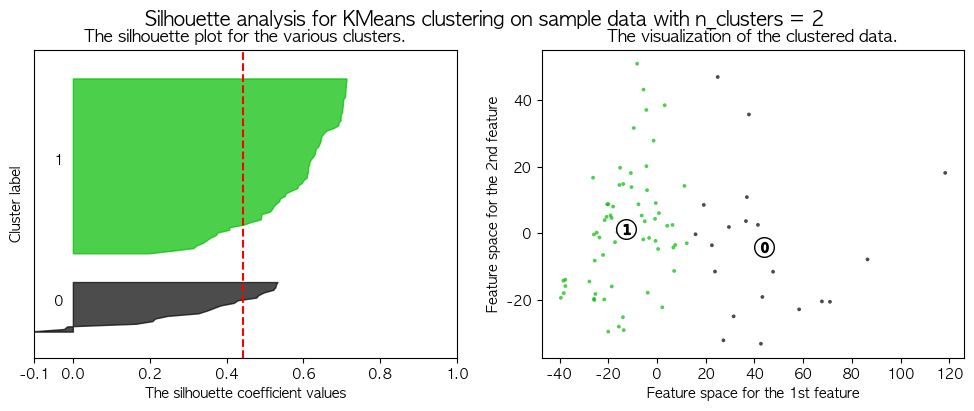

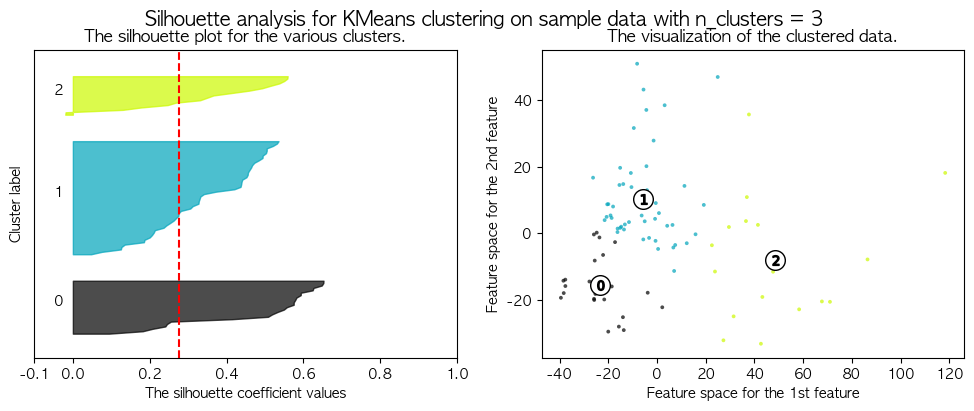

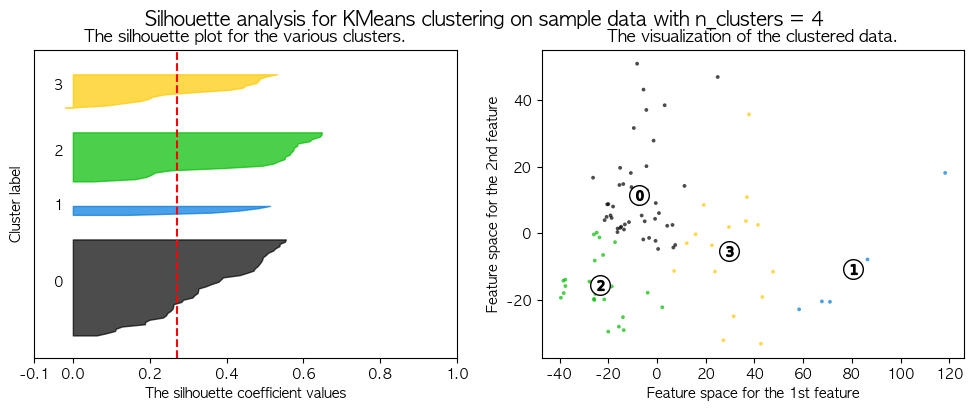

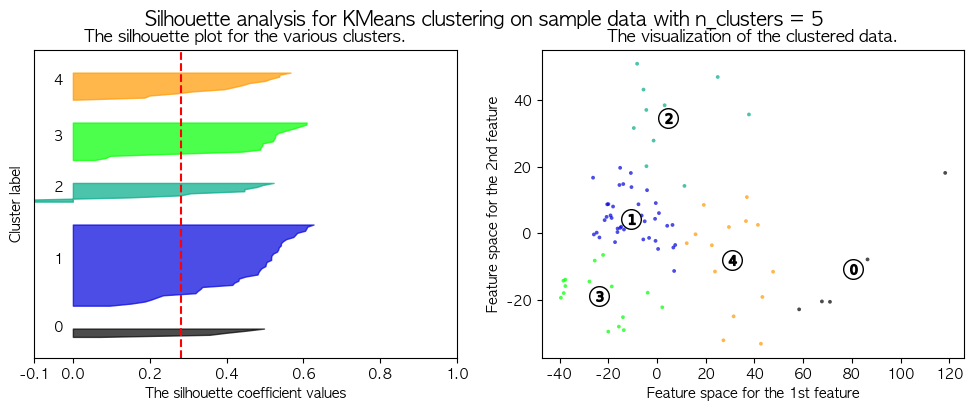

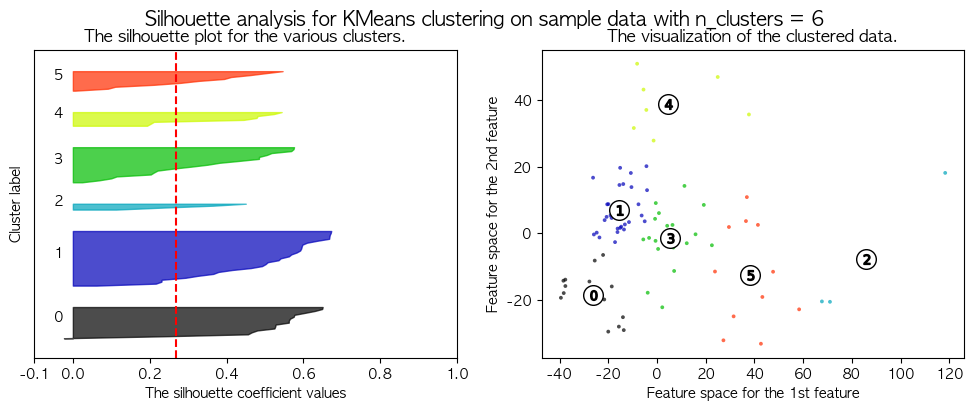

In [34]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
#     fig.set_size_inches(18, 7)
    fig.set_size_inches(12, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pj_data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### 